# Analysis of weather data to predect the appearant temperature 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_weather = pd.read_csv("weatherHistory.csv")

In [3]:
df_weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df_weather.columns


Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [5]:
df_weather = df_weather.rename(columns =
                  {
                      "Temperature (C)":"Temperature",
                      'Apparent Temperature (C)':"Apparent Temperature",
                      'Wind Speed (km/h)' : "Wind Speed",
                      "Wind Bearing (degrees)" :"Wind Bearing",
                      'Visibility (km)':'Visibility',
                       'Pressure (millibars)': 'Pressure' 
                  }
                 )

In [6]:
df_weather.head(2)

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Loud Cover,Pressure,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


# Data Cleaning

In [7]:
print(len(df_weather))
df_weather = df_weather.drop_duplicates()
print(len(df_weather))

96453
96429


In [8]:
df_weather.isna().sum()

Formatted Date            0
Summary                   0
Precip Type             517
Temperature               0
Apparent Temperature      0
Humidity                  0
Wind Speed                0
Wind Bearing              0
Visibility                0
Loud Cover                0
Pressure                  0
Daily Summary             0
dtype: int64

In [9]:
df_weather["Precip Type"].unique()

array(['rain', 'snow', nan], dtype=object)

In [10]:
df_weather[df_weather["Precip Type"].isna()]

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Loud Cover,Pressure,Daily Summary
52672,2012-04-11 16:00:00.000 +0200,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.982,0.0,1002.40,Mostly cloudy until night.
52674,2012-04-11 18:00:00.000 +0200,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.982,0.0,1001.79,Mostly cloudy until night.
52675,2012-04-11 19:00:00.000 +0200,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.982,0.0,1001.60,Mostly cloudy until night.
52677,2012-04-11 21:00:00.000 +0200,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.982,0.0,1001.92,Mostly cloudy until night.
52678,2012-04-11 22:00:00.000 +0200,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.100,0.0,1002.20,Mostly cloudy until night.
...,...,...,...,...,...,...,...,...,...,...,...,...
95584,2016-10-31 19:00:00.000 +0100,Mostly Cloudy,NaN,8.322222,7.044444,0.85,8.0339,290.0,0.000,0.0,1021.73,Mostly cloudy starting in the afternoon.
95585,2016-10-31 20:00:00.000 +0100,Mostly Cloudy,NaN,7.627778,6.183333,0.87,8.2271,293.0,0.000,0.0,1021.76,Mostly cloudy starting in the afternoon.
95586,2016-10-31 21:00:00.000 +0100,Mostly Cloudy,NaN,7.111111,5.511111,0.89,8.5008,297.0,0.000,0.0,1021.81,Mostly cloudy starting in the afternoon.
95587,2016-10-31 22:00:00.000 +0100,Partly Cloudy,NaN,6.672222,4.961111,0.90,8.6457,299.0,0.000,0.0,1021.83,Mostly cloudy starting in the afternoon.


In [11]:
df_weather = df_weather.dropna()

In [12]:
df_weather

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Loud Cover,Pressure,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [13]:
len(df_weather)
df_weather = df_weather[df_weather["Pressure"] != 0]
df_weather

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Loud Cover,Pressure,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [14]:
# from  96453
# to    95912 
# to    94624 

In [15]:
df_weather = df_weather.drop(columns=["Loud Cover"])

In [16]:
len(df_weather["Daily Summary"].unique())

214

In [17]:
len(df_weather["Summary"].unique())

27

# Exploratory Data Analysis

In [18]:
df_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,94624.0,11.954747,9.564560,-21.822222,4.655556,12.055556,18.851389,39.905556
Apparent Temperature,94624.0,10.882686,10.706324,-27.716667,2.300000,12.055556,18.851389,39.344444
Humidity,94624.0,0.734909,0.195838,0.000000,0.600000,0.780000,0.890000,1.000000
Wind Speed,94624.0,10.780227,6.899016,0.000000,5.796000,9.909550,14.103600,63.852600
Wind Bearing,94624.0,187.425273,107.400837,0.000000,116.000000,180.000000,290.000000,359.000000
Visibility,94624.0,10.397271,4.168015,0.000000,8.420300,10.046400,14.908600,16.100000
Pressure,94624.0,1016.801563,7.770814,973.780000,1012.110000,1016.530000,1021.130000,1046.380000


## 1 - Univariat

#### out comes from univariate
+ removed all zero pressure
+ removed loud cover (all values are zeros)
+ wind bearing has the peaks distribution
+ wind speed - visiblity need some preprocessing 

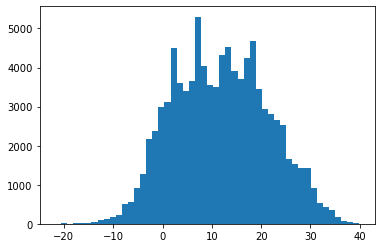

In [19]:
_ = plt.hist(df_weather["Temperature"],bins=50)

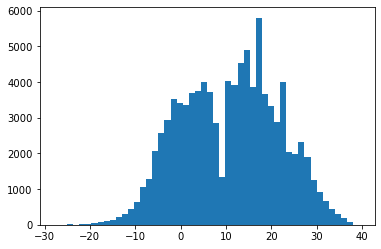

In [20]:
_ = plt.hist(df_weather["Apparent Temperature"],bins=50)

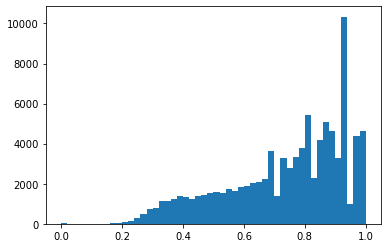

In [21]:
# _ = plt.hist(np.exp(df_weather["Humidity"]).replace(np.NINF,0),bins=50)
_ = plt.hist(df_weather["Humidity"],bins=50)

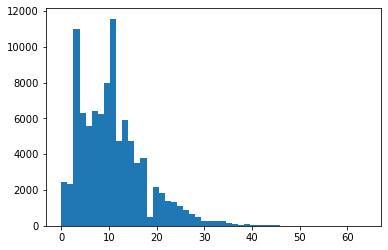

In [22]:
# _ = plt.hist(np.exp(df_weather["Humidity"]).replace(np.NINF,0),bins=50)

_ = plt.hist(df_weather["Wind Speed"],bins=50)

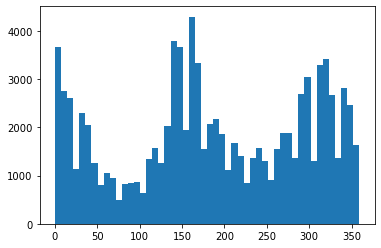

In [23]:
_ = plt.hist(df_weather["Wind Bearing"],bins=50)

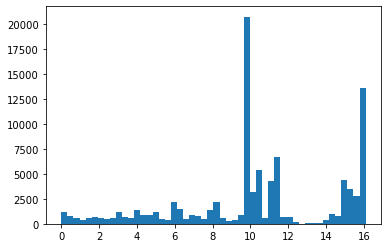

In [24]:
_ = plt.hist(df_weather["Visibility"],bins=50)

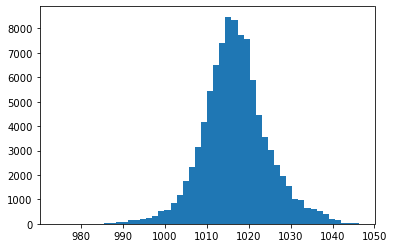

In [25]:
_ = plt.hist(df_weather["Pressure"],bins=50)

# 2 - Bivariate
#### Bivariate exploration outcomes
+ precip type is creating well separated patterns
+ apparent temp is very corrolated with temp 
+ there is no apparent pattern in any of the other features

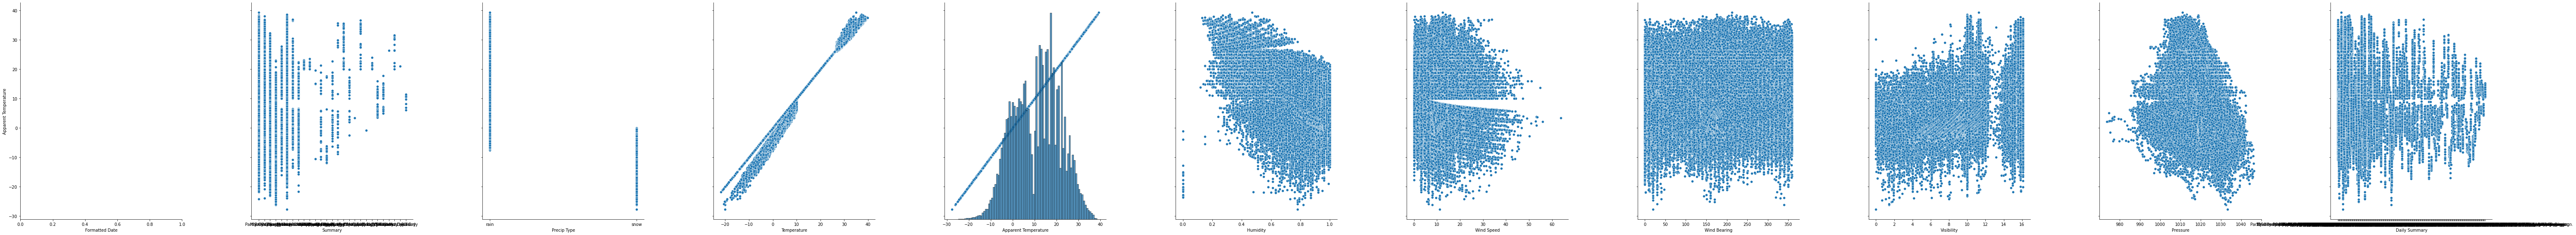

In [26]:
sns.pairplot(data=df_weather,x_vars=df_weather.columns,
y_vars=["Apparent Temperature"], size= 8)

In [27]:
df_weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature',
       'Apparent Temperature', 'Humidity', 'Wind Speed', 'Wind Bearing',
       'Visibility', 'Pressure', 'Daily Summary'],
      dtype='object')

# 2 - MultiVariate
#### MultiVariate exploration outcomes


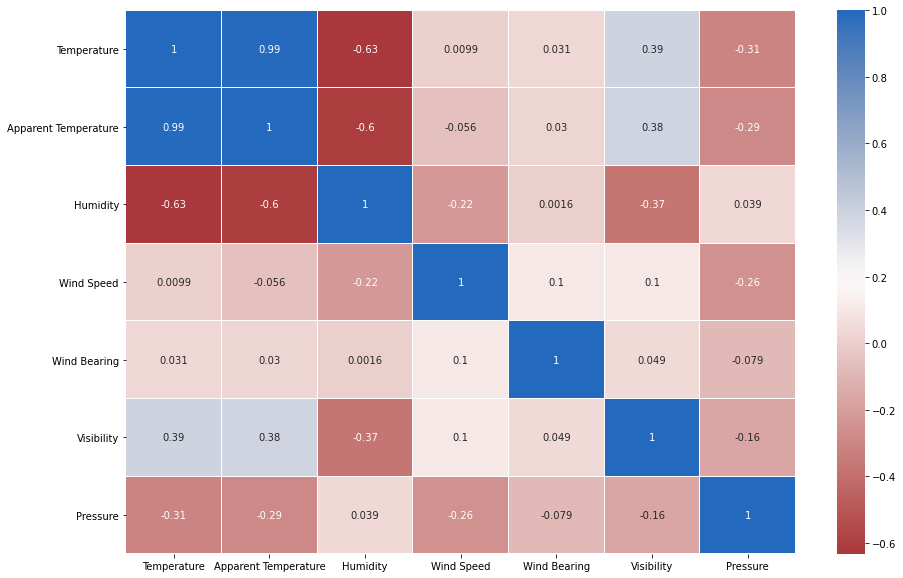

In [31]:
corrMatrix = df_weather.corr()
plt.subplots(figsize=(15,10))  
sns.heatmap(corrMatrix, cmap='vlag_r', linewidths=.1, annot=True)
plt.show()

In [32]:
def encode_columns(df_data):
    df_data["Precip Type"] = df_data["Precip Type"].apply(lambda x: 1 if x == "rain" else 0)
    
    fe =  df_data.groupby("Summary").size() / len(df_data)
    df_data["Summary"] = df_data["Summary"].map(fe)
    
    fe =  df_data.groupby("Daily Summary").size() / len(df_data)
    df_data["Daily Summary"] = df_data["Daily Summary"].map(fe)
    
    return df_data

In [33]:
df_weather = encode_columns(df_weather)

# For single reggression 
## the only feature that can give up  a goode accuracy is Temperature 

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [35]:
X =np.array(df_weather["Temperature"]).reshape(-1,1)
y = np.array(df_weather["Apparent Temperature"]).reshape(-1,1)
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
r2_score(y,y_pred)

0.9853665440251039

# For MultiRegression 
### we can also use humidity cause it has very good corrolation with appearant temperature
+ We got better score when adding Humidity to the formula

In [36]:
X =np.array(df_weather[["Temperature","Humidity"]])
y = np.array(df_weather["Apparent Temperature"]).reshape(-1,1)
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
r2_score(y,y_pred)

0.9863902051399668

## lets try adding another feature 
+ we can add Visiblity (Not much better but it still better)

In [37]:
X =np.array(df_weather[["Temperature","Humidity","Visibility"]])
y = np.array(df_weather["Apparent Temperature"]).reshape(-1,1)
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
r2_score(y,y_pred)

0.9864048873413155

In [38]:
# slightly better
X =np.array(df_weather[["Temperature","Humidity","Visibility","Precip Type","Pressure"]])
y = np.array(df_weather["Apparent Temperature"]).reshape(-1,1)
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
r2_score(y,y_pred)

0.98723376360258

In [39]:
df_weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature',
       'Apparent Temperature', 'Humidity', 'Wind Speed', 'Wind Bearing',
       'Visibility', 'Pressure', 'Daily Summary'],
      dtype='object')

In [40]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=4)
xp = polynomial_features.fit_transform(X)
xp.shape

(94624, 126)

In [41]:
import statsmodels.api as sm

model = sm.OLS(y, xp).fit()
ypred = model.predict(xp) 

ypred.shape

(94624,)

In [42]:
r2_score(y,ypred)

0.9913197851254993

In [43]:
df_weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature',
       'Apparent Temperature', 'Humidity', 'Wind Speed', 'Wind Bearing',
       'Visibility', 'Pressure', 'Daily Summary'],
      dtype='object')

# They should be able to answer some questions like for example:
### 1-	Which features should be included and which should be excluded from the model?
+ "Temperature","Humidity","Visibility","Precip Type","Pressure"   should be included
+ 'Formatted Date', 'Summary',  'Wind Speed', 'Wind Bearing','Visibility', 'Daily Summary' should be excluded

### 2-	What does an R2 of 0.95 mean? 
+ it means that the target value are on (or very close) to the trend line if singel or plane or hyperplane if multi

### 3-	Is model 1 better than model 2 for particular feature set?
+ polynomial model is typically better because it fits the data better using the extra polynomial features that is not existed in the linear regression